## <center>  Scientific Programming with Python
___

## Assignment 5

&nbsp;

**Author:** &nbsp;Erik Autenrieth &nbsp;(eauten2s, 9036029)

**Date:** &nbsp;&nbsp;&nbsp;&nbsp;  2021-06-03 16:20:02

___
    

## Tasks:      

### Read in four CSV Files about  planet moons. Analyze the data using Pandas.
___

### Data provided: 
- Planets :   Saturn, Jupiter, Uranus and Earth.
- Satellites: For each planet a different number.
- Satellit parameters: Semimajor Axis (km), Period (days), Eccentricity[0,1], Inclination (degrees), Mean Diameter (km), Mass (kg)

In [2]:
import sys

import pandas as pd

## Task 1

### Provide a function to read in the datasets, trying to be as generic as possible.

In [10]:
def csv_to_df(file_names:[str]=None):
    """ 
    Converts CSV File's to a single DataFrame without NaN values.
    If the input files iclude satellites, a new column for their planet's will be set.

    Returns: a single DatafFame of all CSV File's.
    """
    data_frames = []  # a container for all DataFrames 
    
    for file in file_names: 
        if('.csv' not in file): sys.exit('No csv-format')  # check if all files are in csv format

        folder = ".\data\\"
        df = pd.read_csv(folder + file )
        
        if ('satellites' in file):           # just if the data provides satellites a new column will be added. 
            planet_names = file.split('_')[0]                      
            df.insert(loc=0, column='Planet', value=planet_names) # setup the first column with the planetname

        data_frames.append(df)           
        
    df = pd.concat(data_frames)          
    df.dropna(how='any', inplace=True)   
    df = df.reset_index(drop=True)       
    return df

### Initiate the dataset for further work.
### Show the beginning of the new planet dataset.

In [11]:
file_names = ['earth_satellites.csv', 'jupiter_satellites.csv', 
              'saturn_satellites.csv','uranus_satellites.csv' ]

planets = csv_to_df(file_names=file_names)  

planets.head(7)

,Planet,Name,Semimajor Axis (km),Period (days),Eccentricity,Inclination (deg),Mean Diameter (km),Mass (kg)
0,earth,Moon,384399.0,27.321700,0.05490,5.1450,3474.8,7.346000e+22
1,jupiter,Io,421800.0,1.769000,0.00400,0.0400,7272.4,8.930000e+22
2,jupiter,Europa,670900.0,3.551810,0.01010,0.4700,6242.8,4.800000e+22
3,jupiter,Ganymede,1070000.0,7.154553,0.00150,0.1950,10536.4,4.810000e+22
4,jupiter,Callisto,1883000.0,16.689018,0.00700,0.2810,9637.6,4.820000e+22
5,saturn,Pan,133584.0,0.575000,0.00001,0.0001,28.0,4.950000e+15
6,saturn,Daphnis,136504.0,0.594000,0.00003,0.0036,7.6,7.700000e+13


## Task 2 
### Display the maximum and minimum moon diameter by using the describe methode.

In [5]:
planets[['Mean Diameter (km)']].describe()

,Mean Diameter (km)
count,28.000000
mean,1975.671429
std,2983.317243
min,2.800000
25%,108.200000
50%,785.000000
75%,1541.250000
max,10536.400000


### Use pandas built in functions min(), max() to display the diameters.

In [6]:
min_diam = planets['Mean Diameter (km)'].min()    # calculate min, max diam.  
max_diam = planets['Mean Diameter (km)'].max()
l_sizes = [min_diam, max_diam]

pos_min = planets['Mean Diameter (km)'].idxmin()  # determine the positions of min, max values
pos_max = planets['Mean Diameter (km)'].idxmax()

planet_min_diam = planets['Name'].iloc[pos_min]   # determine the corresponding moon 
planet_max_diam = planets['Name'].iloc[pos_max]
l_planets = [planet_min_diam, planet_max_diam]

for planet, param in enumerate(['smallest', 'largest']):
    print('The moon {0} has the {1} diameter with : {2} km'.format(l_planets[planet], param, l_sizes[planet]))

The moon Methone has the smallest diameter with : 2.8 km
The moon Ganymede has the largest diameter with : 10536.4 km


In [7]:
planets.loc[pos_max]

Planet                  jupiter
Name                   Ganymede
Semimajor Axis (km)    1.07e+06
Period (days)           7.15455
Eccentricity             0.0015
Inclination (deg)         0.195
Mean Diameter (km)      10536.4
Mass (kg)              4.81e+22
Name: 3, dtype: object

## Task 3

### Calculate and display the correlation matrix of the planets DataFrame.

#### The output matrix shows the dependence of all numerical parameters.


##### Pearson correlation coefficient:

- The value of the pearson correlation coefficient is always between [-1 , 1].
- If the value is 0 there is no lineare correlation.
- If the value is 1 there would be a perfect correlation.

In [6]:
planets_corr_p = planets.corr(method='pearson')  # pearson is the standard coefficient of the corr function
                                                 # only entered to show it explicitly
planets_corr_p  

,Semimajor Axis (km),Period (days),Eccentricity,Inclination (deg),Mean Diameter (km),Mass (kg)
Semimajor Axis (km),1.000000,0.983766,0.927188,0.962307,0.004038,-0.017638
Period (days),0.983766,1.000000,0.946545,0.993813,-0.093400,-0.068866
Eccentricity,0.927188,0.946545,1.000000,0.933918,-0.061836,0.097956
Inclination (deg),0.962307,0.993813,0.933918,1.000000,-0.117098,-0.089248
Mean Diameter (km),0.004038,-0.093400,-0.061836,-0.117098,1.000000,0.726364
Mass (kg),-0.017638,-0.068866,0.097956,-0.089248,0.726364,1.000000


In [7]:
planets_corr_p = planets_corr_p[planets_corr_p < 1]  # drop all ones on the main diagonal 
planets_corr_p     # if there would be other ones, these would also be unrealistic-values    

,Semimajor Axis (km),Period (days),Eccentricity,Inclination (deg),Mean Diameter (km),Mass (kg)
Semimajor Axis (km),NaN,0.983766,0.927188,0.962307,0.004038,-0.017638
Period (days),0.983766,NaN,0.946545,0.993813,-0.093400,-0.068866
Eccentricity,0.927188,0.946545,NaN,0.933918,-0.061836,0.097956
Inclination (deg),0.962307,0.993813,0.933918,NaN,-0.117098,-0.089248
Mean Diameter (km),0.004038,-0.093400,-0.061836,-0.117098,NaN,0.726364
Mass (kg),-0.017638,-0.068866,0.097956,-0.089248,0.726364,NaN


In [8]:
p_semax_period = planets_corr_p['Period (days)'].iloc[0]
print('p-value (sem.axis/period):',round(p_semax_period,4))

p-value (sem.axis/period): 0.9838


### The correllation between the satellites' semimajor axis and the orbital period is: $\approx$  0.9838	
___
This is one of the highest values of the correlations matrix. We drop the ones  because the main diagonal values are reflexive connections. Getting a one between two non-identical records is very rare and 0.989705 is very closse to one. That meas The semi-major axis of the satellites is (almost) proportionally dependent on the period duration and vice versa.
___
#### Maybe in this case it is trivial, because the longer the route in (km), the longer it will take to complete it (in days).

## Task 4

### Barplots 

#### 1.  moon names vs. mass
#### 2.  moon names vs. diameter

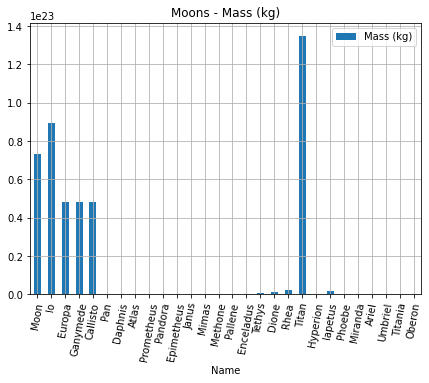

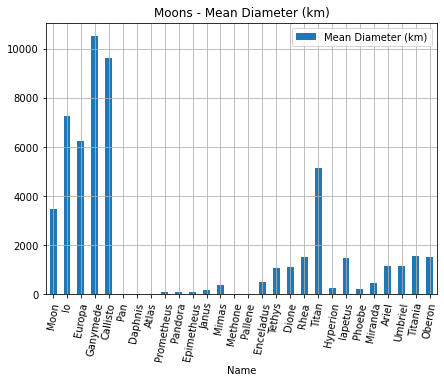

In [40]:
# the moons in the DataFrame are already grouped according to their planets
param = ['Mass (kg)', 'Mean Diameter (km)']  # parametes for y-axis
for y in param:
    planets.plot.bar(x='Name', y=y, figsize=(7,5), grid=True, rot=80,
                     label=str(y), title='Moons - '+str(y))  

### Trying to plot the data more accurate by setting the y-limit for the mass to 1/100 and for diameter to 1/4 of the data's maximum y-value. So we zoom into the plot.
### Withe a density-plot we try to find out why so many values are not displayed.
### This time we sort the dataframe according to y-size.

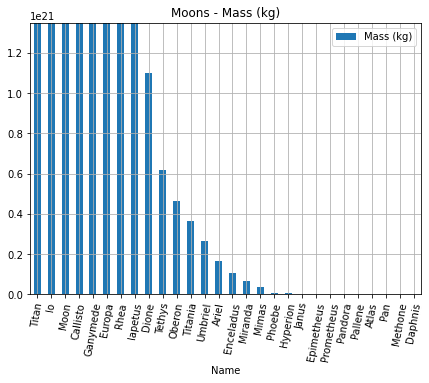

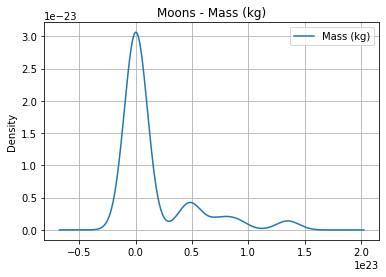

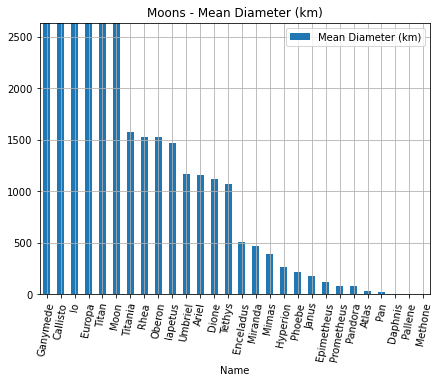

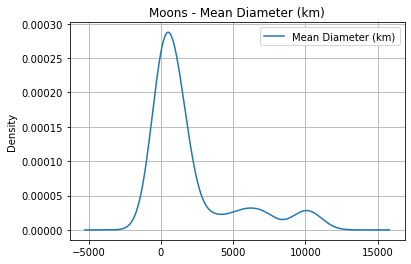

In [41]:
delta = [1/100, 1/4]          # two parameters to minimize the y-limit of the plots

for d, y in enumerate(param):           
    planets_sort = planets.sort_values(by=y, ascending=False)  # sort the df based on the y-value, not inplace
    
    planets_sort.plot.bar(x='Name',y=y ,figsize=(7,5), grid=True, rot=80, label=str(y), 
                          ylim=(0.0, planets_sort[y].max() * delta[d] ),title='Moons - '+str(y))
    
    # density plot to show why so many values are not displayed
    planets_sort.plot.density(x='Name',y=y, bw_method=0.3, grid=True,title='Moons - '+str(y))         

array([<AxesSubplot:title={'center':'Satellite Diameters (log vals.)'}, xlabel='Names', ylabel='Mean Diameter (km)'>,
       <AxesSubplot:title={'center':'Satellite Mass (log vals.)'}, xlabel='Names', ylabel='Mean Diameter (km)'>],
      dtype=object)

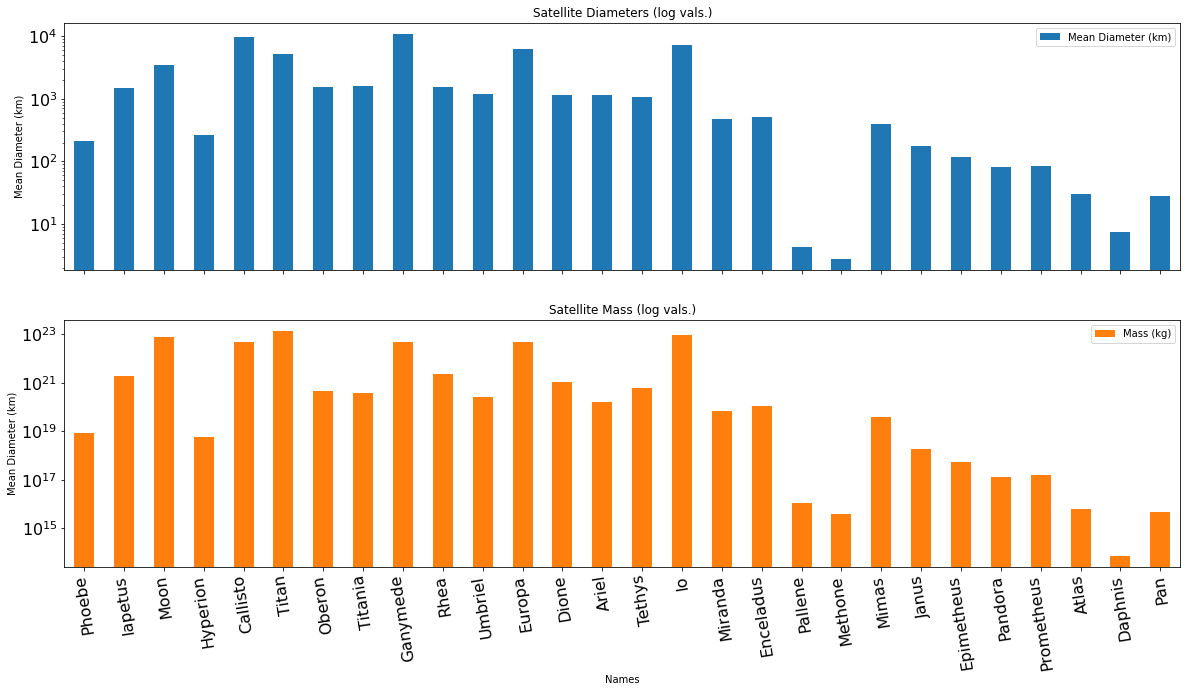

In [52]:
planets.plot(x='Name', y=['Mean Diameter (km)', 'Mass (kg)'], kind='bar', 
             xlabel='Names', ylabel='Mean Diameter (km)', title=['Satellite Diameters (log vals.)', 
                                                                 'Satellite Mass (log vals.)'],
             fontsize=16, rot=99, figsize=(20,10), sharex=True, subplots=True, logy=True )

## Task 5 
### Sort the planets DataFrame based on the Period(days), inplace.

In [42]:
planets.sort_values(by='Period (days)', ascending=False, inplace=True)  
planets.reset_index(drop=True, inplace=True)                            

In [43]:
planets.head()

,Planet,Name,Semimajor Axis (km),Period (days),Eccentricity,Inclination (deg),Mean Diameter (km),Mass (kg)
0,saturn,Phoebe,12948000.0,548.020000,0.1635,175.243,213.0,8.290000e+18
1,saturn,Iapetus,3560851.0,79.330000,0.0293,8.313,1471.0,1.810000e+21
2,earth,Moon,384399.0,27.321700,0.0549,5.145,3474.8,7.346000e+22
3,saturn,Hyperion,1500934.0,21.280000,0.0232,0.615,266.0,5.580000e+18
4,jupiter,Callisto,1883000.0,16.689018,0.0070,0.281,9637.6,4.820000e+22


## Task 6 
### Function for convert the DataFrame into an CSV File.

In [46]:
def df_to_csv(data_frame=None, name:str=None):
    """ 
    Converts a DataFrame into a csv-file with given name.
    Uses spaces as a separator. 
    """
    if (not isinstance(data_frame, pd.core.frame.DataFrame)):
        sys.exit('No pandas DataFrame as input')
    file_name = name + '.csv'
    csv_file = data_frame.to_csv(file_name, sep=' ', encoding='utf-8', float_format='%g', index=False)        
    print('Yor CSV File:',' "' + file_name + ' "', 'was created. \nHave a great day! :)')
    return csv_file

In [47]:
df_to_csv(data_frame=planets, name='planets_satellites')

Yor CSV File:  "planets_satellites.csv " was created. 
Have a great day! :)
